<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QAE_00_Grok_mkbahk_20250428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d7e0d5eb7d378d0c5deeb984a4edecc4f28cdd4d3536d85d293d6f30ad5adb29
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.9 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

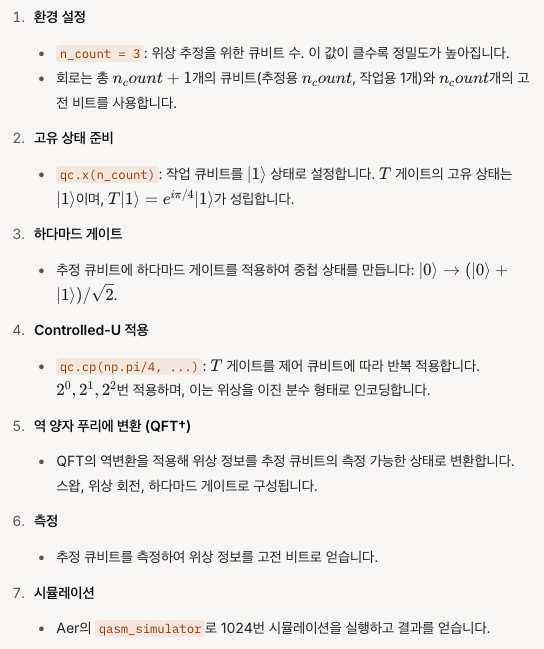

In [ ]:
# QPE 회로 설정
n_count = 3  # 위상 추정을 위한 큐비트 수 (정밀도 결정)
qc = QuantumCircuit(n_count + 1, n_count)  # n_count + 1개의 큐비트, n_count개의 고전 비트

# 고유 상태 |1> 준비 (U의 고유 상태로 설정)
qc.x(n_count)  # 마지막 큐비트를 |1>로 설정
qc.barrier()

# 추정 큐비트에 하다마드 게이트 적용
for qubit in range(n_count):
    qc.h(qubit)
###for
qc.barrier()

# Controlled-U (T 게이트) 적용
for qubit in range(n_count):
    for _ in range(2**qubit):  # 2^qubit 번 반복
        qc.cp(np.pi/4, qubit, n_count)  # Controlled-T 게이트 (위상 π/4)
    ###for
###for

# 역 양자 푸리에 변환 (QFT†)
for qubit in range(n_count//2):
    qc.swap(qubit, n_count-1-qubit)
###for

for j in range(n_count):
    for m in range(j):
        qc.cp(-np.pi/float(2**(j-m)), m, j)
    ###for
    qc.h(j)
###for

qc.barrier()

# 측정
qc.measure(range(n_count), range(n_count))

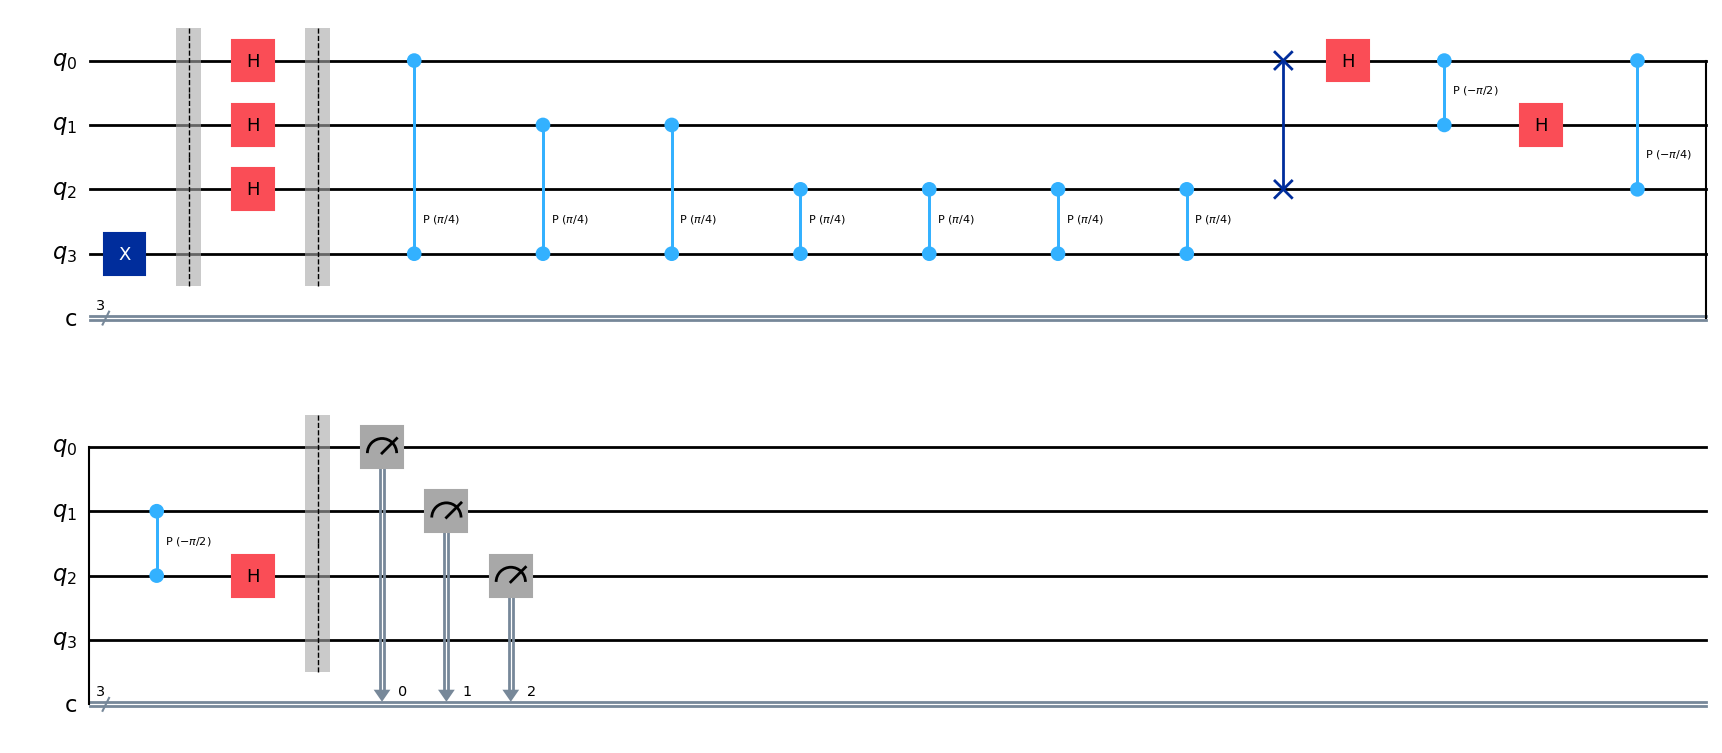

In [ ]:
qc.draw("mpl")

In [ ]:
# 시뮬레이터 설정 및 실행
simulator = Aer.get_backend('qasm_simulator')

tqc = transpile(qc, simulator)
#qobj = assemble(tqc)

result = simulator.run(tqc, shots=1024).result()
counts = result.get_counts()

# 결과 출력
print(counts)

{'001': 1024}


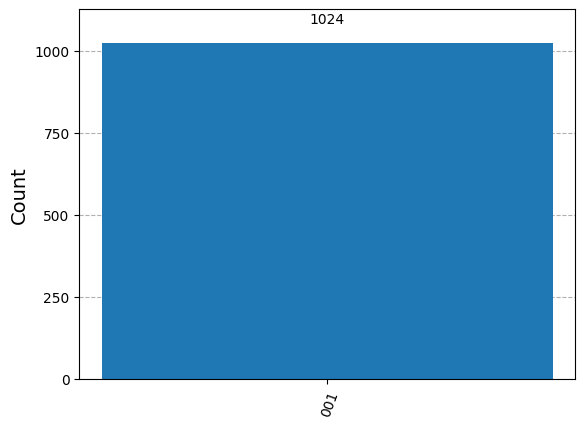

In [ ]:
plot_histogram(counts)

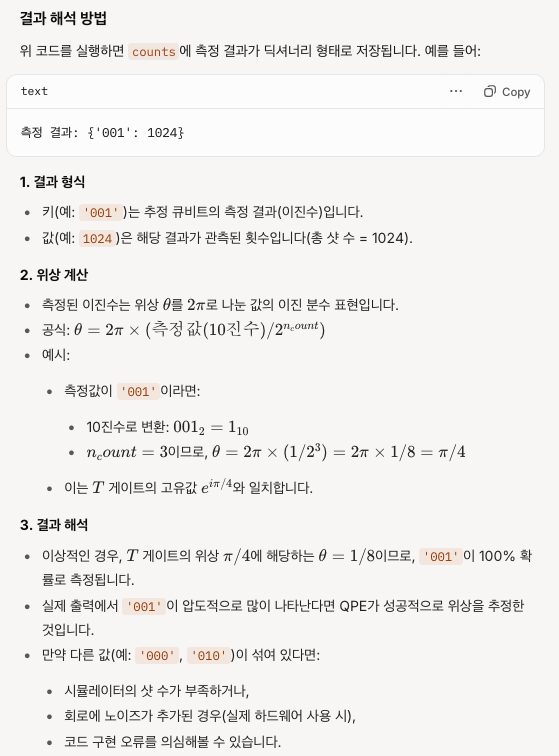